The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1) Question or problem definition.
2) Acquire training and testing data.
3) Wrangle, prepare, cleanse the data.
4) Analyze, identify patterns, and explore the data.
5) Model, predict and solve the problem.
6) Visualize, report, and present the problem solving steps and final solution.
7) Supply or submit the results.

## Question and problem definition

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [1]:
import pandas as pd
import numpy as np
import random as rnd

#Vis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train=pd.read_csv('/Users/shivamgautam/Downloads/GITHUB_PUSH/machine learning projects/Dataset/titanic_train.csv')

In [3]:
test=pd.read_csv('/Users/shivamgautam/Downloads/GITHUB_PUSH/machine learning projects/Dataset/titanic_test.csv')

In [4]:
train.shape

(891, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.shape

(418, 11)

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.info()
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [9]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cavendish, Mr. Tyrell William",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
print('TRAIN')
print(train.isnull().sum())
print('--'*40)
print('TEST')
print(test.isnull().sum())

TRAIN
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------------------------------------
TEST
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
#age missing value
(177)/891 
#19.8 missing age value from the sample data set
#age is good 

0.19865319865319866

In [12]:
#for cabin
(687)/891
# missing value are 77% which is very high and it will be of no use to fill these value.

0.7710437710437711

In [13]:
2/891 
#0.22% is only the missing value of we can easily fill up these 

0.002244668911335578

In [14]:
train.columns=[i.lower() for i in train.columns]

In [15]:
test.columns=[i.lower() for i in test.columns]

In [16]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
def unique_check(data):
    for i in data.columns:
        print(i,data[i].nunique())

In [18]:
unique_check(train)

passengerid 891
survived 2
pclass 3
name 891
sex 2
age 88
sibsp 7
parch 7
ticket 681
fare 248
cabin 147
embarked 3


### Data visualization

,sex,survived
0,female,0.742038
1,male,0.188908


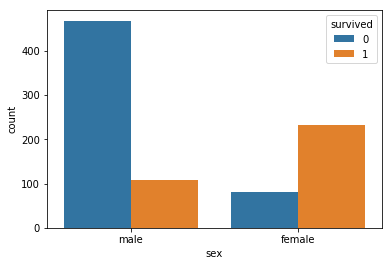

In [19]:
sns.countplot('sex',data=train,hue='survived')
train[['sex','survived']].groupby(['sex'],as_index=False).mean().sort_values(by='survived',ascending=False)

In [20]:
print(train['survived'][train['sex']=='male'].value_counts(normalize=True)[1]*100)
print(train['survived'][train['sex']=='female'].value_counts(normalize=True)[1]*100)



18.890814558058924
74.20382165605095


<function matplotlib.pyplot.show(*args, **kw)>

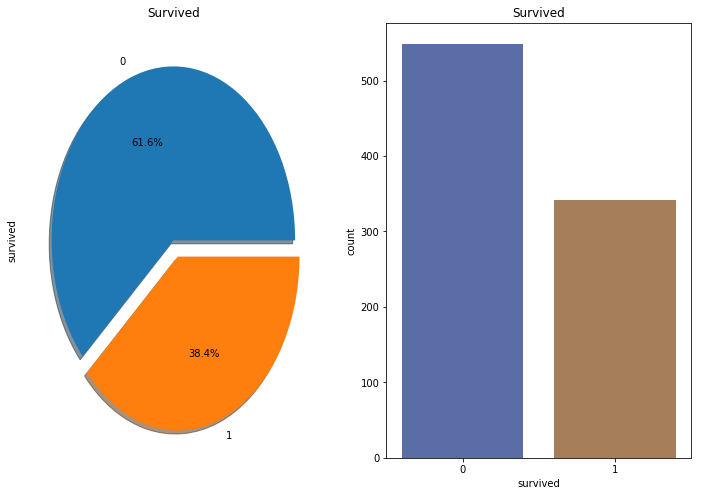

In [21]:
fig,ax=plt.subplots(1,2,figsize=(12,8))
train['survived'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Survived')
sns.countplot(train['survived'],ax=ax[1],saturation=0.3,palette='bright')
ax[1].set_title('Survived')
plt.show

Text(0.5,1,'Survived as per class')

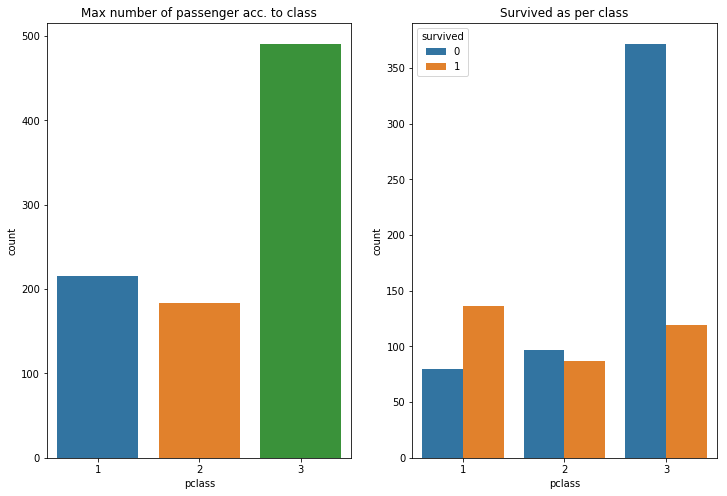

In [22]:
fig,ax=plt.subplots(1,2,figsize=(12,8))
sns.countplot('pclass',data=train,ax=ax[0])
ax[0].set_title('Max number of passenger acc. to class')
sns.countplot('pclass',hue='survived',data=train,ax=ax[1])
ax[1].set_title('Survived as per class')

percentage of pclass1 : 62.96296296296296
percentage of pclass2 : 47.28260869565217
percentage of pclass3 : 24.236252545824847


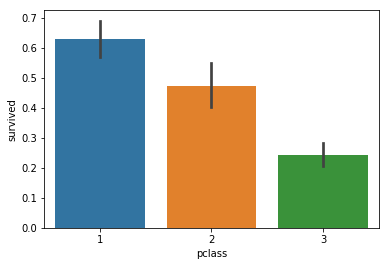

In [23]:
sns.barplot(x='pclass',y='survived',data=train)
print('percentage of pclass1 :',train['survived'][train['pclass']==1].value_counts(normalize=True)[1]*100)
print('percentage of pclass2 :', train['survived'][train['pclass']==2].value_counts(normalize=True)[1]*100)
print('percentage of pclass3 :', train['survived'][train['pclass']==3].value_counts(normalize=True)[1]*100)

In [24]:
train[['survived','pclass']].groupby(['pclass'],as_index=False).mean().sort_values(by='survived',ascending=False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)


([<matplotlib.axis.XTick at 0x7fb57045a7b8>,
 <a list of 3 Text xticklabel objects>)

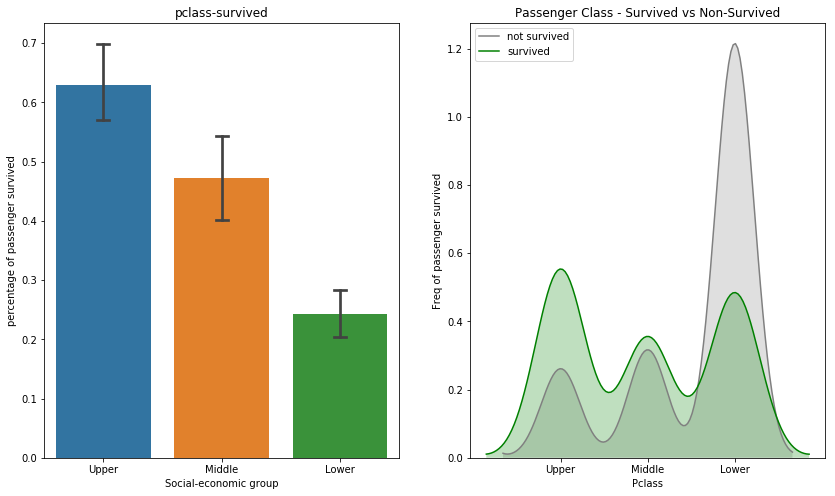

In [25]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.barplot(x='pclass',y='survived',data=train,linewidth=5,capsize=.1)
plt.title('pclass-survived')
plt.xlabel('Social-economic group')
plt.ylabel('percentage of passenger survived')
labels=['Upper','Middle','Lower']
vals=[0,1,2]
plt.xticks(vals,labels)
plt.subplot(1,2,2)
sns.kdeplot(train.pclass[train.survived==0],color='gray',shade=True,label='not survived')
sns.kdeplot(train.pclass[train.survived==1],color='green',shade=True,label='survived')
plt.title('Passenger Class - Survived vs Non-Survived')
plt.ylabel('Freq of passenger survived')        
plt.xlabel('Pclass')
plt.xticks(sorted(train.pclass.unique()),labels)

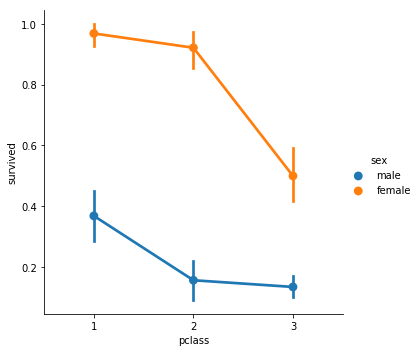

In [26]:
sns.catplot('pclass','survived',hue='sex',data=train,kind='point')

From the catplot plot above, we can figure out that urvival for Women from Pclass1 is above 90%. It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.#

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


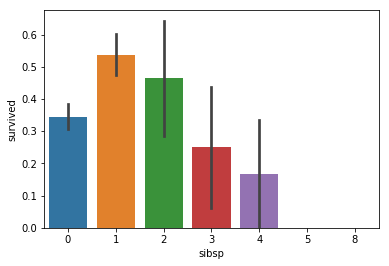

In [27]:
sns.barplot(x="sibsp", y="survived", data=train)
train[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

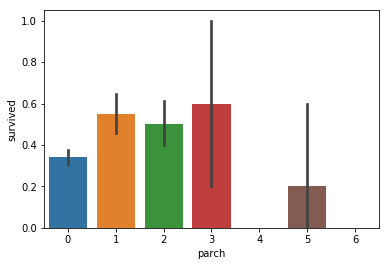

In [28]:
sns.barplot(x="parch", y="survived", data=train)
plt.show()

Text(0.5,1,'Test Set')

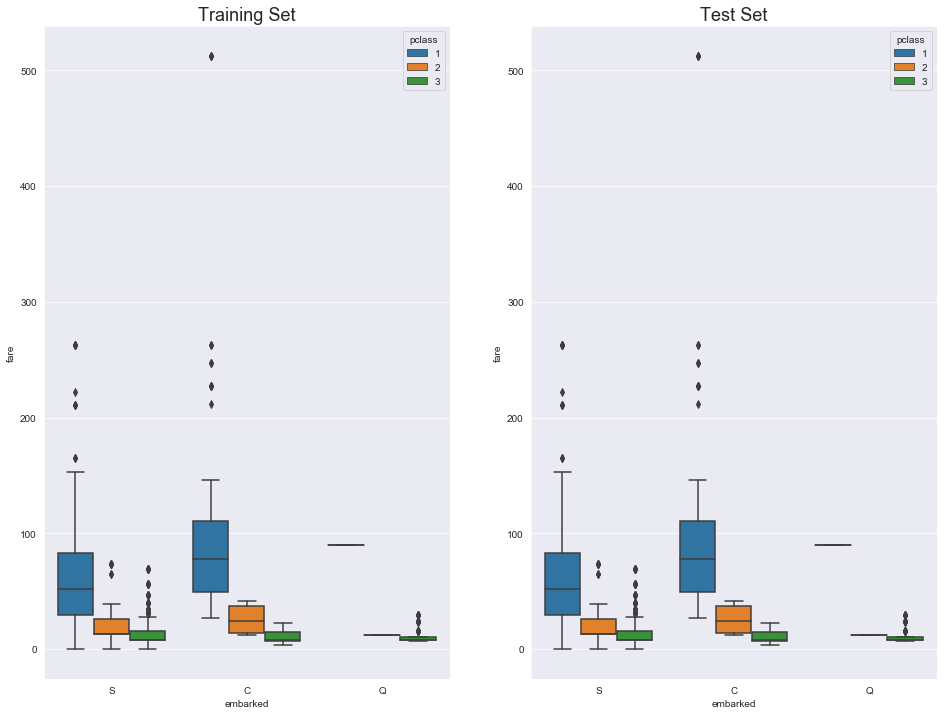

In [29]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="embarked", y="fare", hue="pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="embarked", y="fare", hue="pclass", data=train, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


/Users/shivamgautam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/shivamgautam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


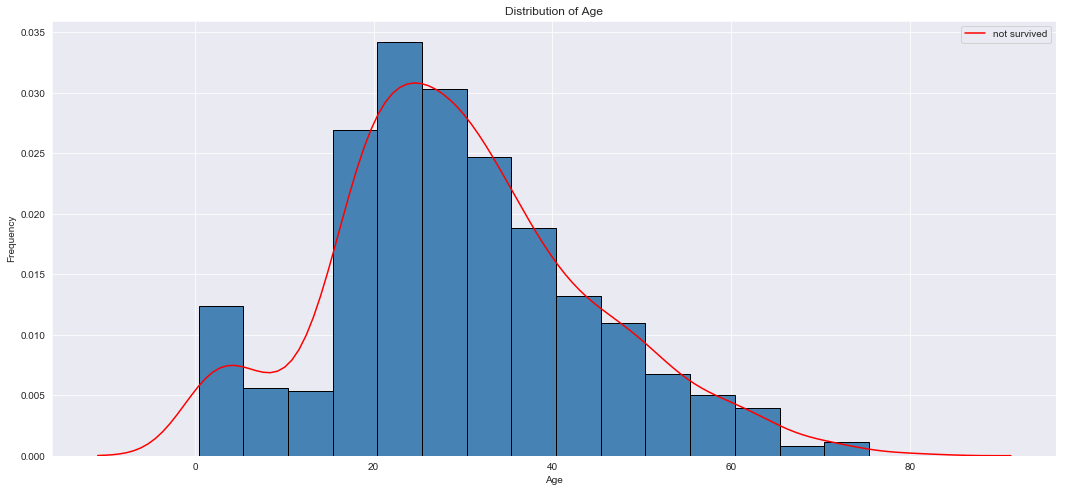

In [30]:
print('Oldest Passenger was of:',train['age'].max(),'Years')
print('Youngest Passenger was of:',train['age'].min(),'Years')
print('Average Age on the ship:',train['age'].mean(),'Years')
plt.figure(figsize=(18,8))
plt.hist(train['age'], 
        bins = np.arange(train['age'].min(),train['age'].max(),5),
        density = True, 
        color = 'steelblue',
        edgecolor = 'k')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
ax=sns.kdeplot(train['age'] , 
               color='red',
               shade=False,
               label='not survived')
plt.tick_params(top=False, right=False)
plt.show()

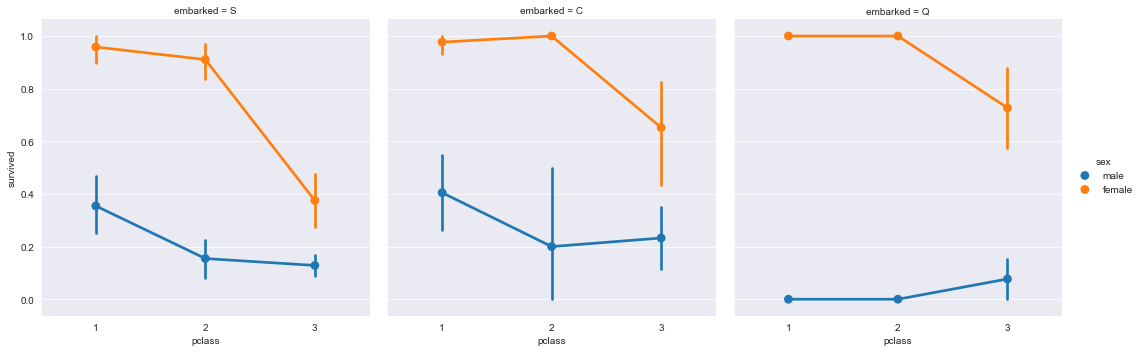

In [31]:
sns.catplot('pclass','survived',hue='sex',col='embarked',data=train,kind='point')
plt.show()

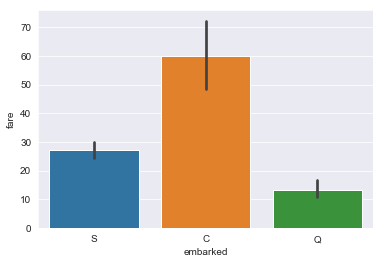

In [32]:
sns.barplot('embarked','fare',data=train)

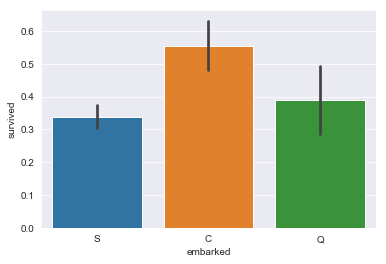

In [33]:
sns.barplot('embarked','survived',data=train)

In [34]:
bins = [0, 5, 12, 18, 24, 35, 60,np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["age"], bins, labels = labels)
test['AgeGroup']=pd.cut(test['age'],bins,labels=labels)


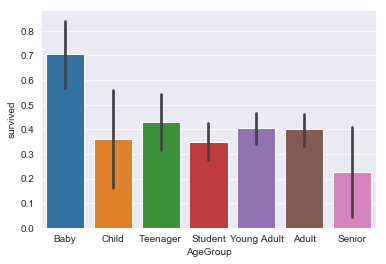

In [35]:
#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="survived", data=train)

In [36]:
train["cabin"].notnull().astype('int').head()

0    0
1    1
2    0
3    1
4    0
Name: cabin, dtype: int64

In [37]:
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
AgeGroup       177
dtype: int64

In [38]:
train=train.drop(['cabin'],axis=1)

In [39]:
test=test.drop(['cabin'],axis=1)

In [40]:
test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Student


In [41]:
test.isnull().sum()

passengerid     0
pclass          0
name            0
sex             0
age            86
sibsp           0
parch           0
ticket          0
fare            1
embarked        0
AgeGroup       86
dtype: int64

In [42]:
train = train.drop(['ticket'], axis = 1)
test = test.drop(['ticket'], axis = 1)


In [43]:
train.embarked.mode()[0]

'S'

In [44]:
#train['embarked']=train['embarked'].fillna(train.embarked.mode()[0])

In [45]:
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
AgeGroup       177
dtype: int64

In [46]:
pd.crosstab([train.sibsp],train.survived).style.background_gradient(cmap='summer_r')

survived,0,1
sibsp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [47]:
pd.crosstab(train.sibsp,train.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
sibsp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [48]:
test[test.fare.isnull()]

,passengerid,pclass,name,sex,age,sibsp,parch,fare,embarked,AgeGroup
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,Senior


In [49]:
missing_val=test[(test['pclass']==3) & (test['embarked']=='S') & (test['sex']=='male')].fare.mean()

In [50]:
missing_val

12.718872

In [51]:
test.fare.fillna(missing_val,inplace=True)

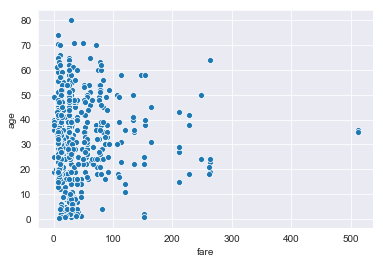

In [52]:
sns.scatterplot(train["fare"], train["age"])

In [53]:
#data_train = data_train[data_train.Fare < 300]
#drop the outliners

In [54]:
combine=[train,test]
for dataset in combine:
    dataset['familysize'] = dataset['sibsp'] + dataset['parch'] + 1

train[['familysize', 'survived']].groupby(['familysize'], as_index=False).mean().sort_values(by='survived', ascending=False)

,familysize,survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [55]:
for dataset in combine:
    dataset['isalone'] = 0
    dataset.loc[dataset['familysize'] == 1, 'isalone'] = 1

train[['isalone', 'survived']].groupby(['isalone'], as_index=False).mean()

,isalone,survived
0,0,0.505650
1,1,0.303538


In [56]:
for dataset in combine:
    dataset['Title']=dataset.name.str.extract(' ([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['sex'])

sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [57]:
for dataset in combine:
    dataset['Title']= dataset['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev','Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    
train[['Title', 'survived']].groupby(['Title'], as_index=False).mean()


,Title,survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [58]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,AgeGroup,familysize,isalone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,2,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1,1,1


In [59]:
train = train.drop(['name', 'passengerid'], axis=1)
test = test.drop(['name'], axis=1)
train.shape, test.shape

((891, 12), (418, 12))

In [60]:
mr_age=train.groupby(train['Title']==1)['age'].mean().sort_values()[True] #Young Adult

In [61]:
mr_age

32.368090452261306

In [62]:
miss_age=train.groupby(train['Title']==2)['age'].mean().sort_values()[True] #Student

In [63]:
mrs_age = train.groupby(train['Title']==3)['age'].mean().sort_values()[True]#Adult
master_age = train.groupby(train['Title']==4)['age'].mean().sort_values()[True] #baby
royal_age = train.groupby(train['Title']==5)['age'].mean().sort_values()[True] #big
rare_age = train.groupby(train["Title"] == 6)["age"].mean().sort_values()[True] #Adult

In [64]:
mr_age,mrs_age

(32.368090452261306, 35.788990825688074)

In [65]:
miss_age,master_age

(21.845637583892618, 4.574166666666667)

In [66]:
royal_age,rare_age

(43.333333333333336, 45.89473684210526)

In [67]:
#train['age']=train['age'].where((train['Title']==1)&(train['age']==np.isnan),mr_age)

In [68]:
#train['age'].isnull().sum()

In [69]:
#for index, row in train.iterrows():
#    if row['Title']==1:
        

In [70]:
#(train['age'][train['Title']==1]).fillna(mr_age,inplace=True)

In [71]:
train.loc[train.Title==1, 'age']=train.loc[train.Title==1,'age'].fillna(mr_age)


In [72]:
train.loc[train.Title==2, 'age']=train.loc[train.Title==2,'age'].fillna(miss_age)

In [73]:
train.loc[train.Title==3, 'age']=train.loc[train.Title==3,'age'].fillna(mrs_age)

In [74]:
train.loc[train.Title==4, 'age']=train.loc[train.Title==4,'age'].fillna(master_age)

In [75]:
train.loc[train.Title==5, 'age']=train.loc[train.Title==5,'age'].fillna(royal_age)

In [76]:
train.loc[train.Title==6, 'age']=train.loc[train.Title==6,'age'].fillna(rare_age)

In [77]:
train.drop(columns='AgeGroup',inplace=True)

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.759842833203972 Years


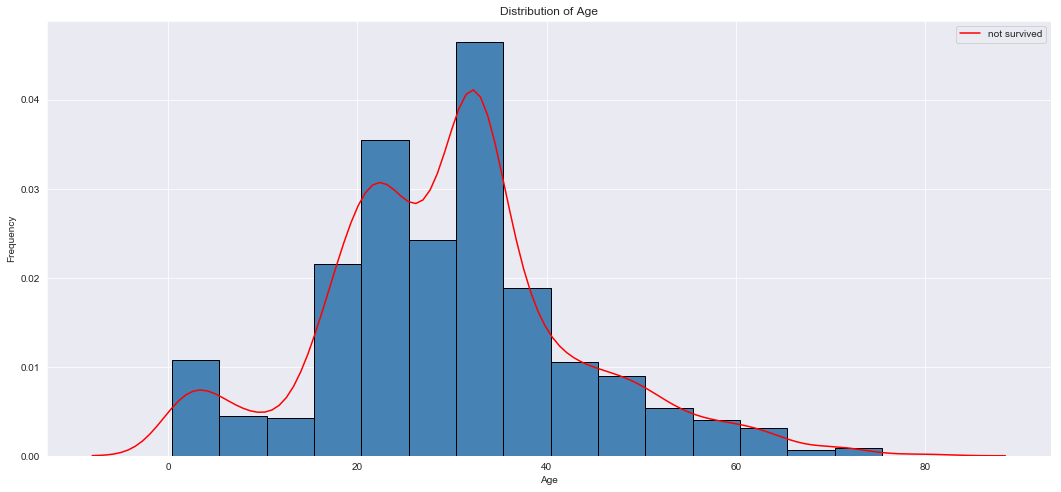

In [78]:
print('Oldest Passenger was of:',train['age'].max(),'Years')
print('Youngest Passenger was of:',train['age'].min(),'Years')
print('Average Age on the ship:',train['age'].mean(),'Years')
plt.figure(figsize=(18,8))
plt.hist(train['age'], 
        bins = np.arange(train['age'].min(),train['age'].max(),5),
        density = True, 
        color = 'steelblue',
        edgecolor = 'k')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
ax=sns.kdeplot(train['age'] , 
               color='red',
               shade=False,
               label='not survived')
plt.tick_params(top=False, right=False)
plt.show()

In [79]:
train.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
familysize    0
isalone       0
Title         0
dtype: int64

In [80]:
test.isnull().sum()

passengerid     0
pclass          0
sex             0
age            86
sibsp           0
parch           0
fare            0
embarked        0
AgeGroup       86
familysize      0
isalone         0
Title           0
dtype: int64

In [81]:
test.loc[train.Title==1, 'age']=test.loc[train.Title==1,'age'].fillna(mr_age)
test.loc[train.Title==2, 'age']=test.loc[train.Title==2,'age'].fillna(miss_age)
test.loc[train.Title==3, 'age']=test.loc[train.Title==3,'age'].fillna(mrs_age)
test.loc[train.Title==4, 'age']=test.loc[train.Title==4,'age'].fillna(master_age)
test.loc[train.Title==5, 'age']=test.loc[train.Title==5,'age'].fillna(royal_age)
test.loc[train.Title==6, 'age']=test.loc[train.Title==6,'age'].fillna(rare_age)

In [82]:
test.isnull().sum()

passengerid     0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
AgeGroup       86
familysize      0
isalone         0
Title           0
dtype: int64

In [83]:
test.drop(columns='AgeGroup',inplace=True)

In [84]:
a=train.loc[(train.pclass==1) & (train.sex=='female'),('fare','embarked','sibsp','age')]

In [85]:
train.embarked.fillna(a.embarked.mode()[0],inplace=True)

### Model, predict

In [86]:
all_dumm=pd.get_dummies(train,columns=['sex','embarked','pclass','familysize'],drop_first=True)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,familysize,isalone,Title
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,2,0,3
2,1,3,female,26.0,0,0,7.9250,S,1,1,2
3,1,1,female,35.0,1,0,53.1000,S,2,0,3
4,0,3,male,35.0,0,0,8.0500,S,1,1,1


In [87]:
train=pd.concat([all_dumm],axis=1)

In [88]:
all_dumm=pd.get_dummies(test,columns=['sex','embarked','pclass','familysize'],drop_first=True)
test=pd.concat([all_dumm],axis=1)
test.head()

,passengerid,age,sibsp,parch,fare,isalone,Title,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3,familysize_2,familysize_3,familysize_4,familysize_5,familysize_6,familysize_7,familysize_8,familysize_11
0,892,34.5,0,0,7.8292,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0
1,893,47.0,1,0,7.0000,0,3,0,0,1,0,1,1,0,0,0,0,0,0,0
2,894,62.0,0,0,9.6875,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
3,895,27.0,0,0,8.6625,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0
4,896,22.0,1,1,12.2875,0,3,0,0,1,0,1,0,1,0,0,0,0,0,0


In [89]:
#X_train = train.drop("survived", axis=1)


In [90]:
#Y_train = train["survived"]


In [91]:
#X_test  = test.drop("passengerid", axis=1).copy()

In [92]:
#X_train.shape, Y_train.shape, X_test.shape


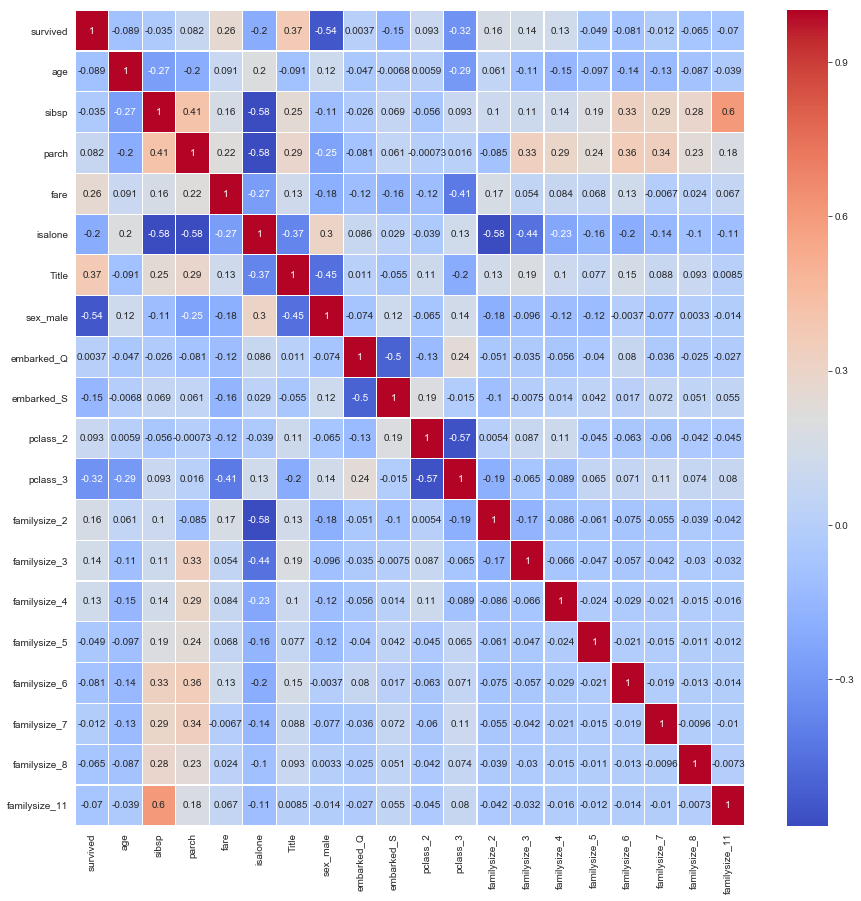

In [89]:
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()


In [94]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# age_fare = train[['age','fare']] # get age and fare features
# age_fare = mms.fit_transform(age_fare)
# age_fare_df = pd.DataFrame(age_fare, columns=['age','fare']) # scaling data
# # train.drop(['age','fare'], axis=1, inplace=True)
# # train = train.reset_index(drop=True)
# # train = pd.concat([train, age_fare_df],axis=1) # merge the scaling data back to train data set

# age_fare = test[['age','fare']] #same for test
# age_fare = mms.fit_transform(age_fare)
# age_fare_df = pd.DataFrame(age_fare, columns=['age','fare']) # scaling data
# # test.drop(['age','fare'], axis=1, inplace=True)
# # test = test.reset_index(drop=True)
# # test = pd.concat([test, age_fare_df],axis=1)

In [90]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()


In [96]:
#train.drop(['age','fare'], axis=1, inplace=True)
#train = train.reset_index(drop=True)
#train = pd.concat([data_train, age_fare_df],axis=1) # merge the scaling data back to train data set

In [93]:
age_fare = train[['age','fare']] # get age and fare features
age_fare = mms.fit_transform(age_fare)
age_fare_df = pd.DataFrame(age_fare, columns=['age','fare']) # scaling data
#train.drop(['age','fare'], axis=1, inplace=True)

In [94]:
train.drop(['age','fare'], axis=1, inplace=True)

In [95]:
train = train.reset_index(drop=True)
train = pd.concat([train,age_fare_df],axis=1)

In [100]:
age_fare = test[['age','fare']] #same for test
age_fare = mms.fit_transform(age_fare)
age_fare_df = pd.DataFrame(age_fare, columns=['age','fare']) # scaling data
test.drop(['age','fare'], axis=1, inplace=True)
test = test.reset_index(drop=True)
test = pd.concat([test, age_fare_df],axis=1)



#can also be done for title get_dummies. and then check.

In [120]:
X_train = train.drop("survived", axis=1)

Y_train = train["survived"]

X_test  = test.drop("passengerid", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)


((891, 19), (891,), (418, 19))

In [106]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedShuffleSplit(n_splits = 10, random_state =5 ) 
column_names = X_train.columns
X = X_train.values

# use grid search to get the best parameters
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18] #alpla of lasso and ridge 
penalties = ['l1','l2'] # Choosing penalties(Lasso(l1) or Ridge(l2))
cv = StratifiedShuffleSplit(n_splits = 10) # Choose a cross validation strategy. 
param = {'penalty': penalties, 'C': C_vals} # setting param for param_grid in GridSearchCV. 
logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                     cv = cv
                          )
## Fitting the model
grid.fit(X_train, Y_train)

# get accuracy
logreg_grid = grid.best_estimator_
acc_log=logreg_grid.score(X_train,Y_train)
print(acc_log)

0.8125701459034792


In [135]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,31)
weights_options=['uniform','distance']
param = {'n_neighbors':k_range, 'weights':weights_options}
cv = StratifiedShuffleSplit(n_splits=10,random_state=15)
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
grid.fit(X_train,Y_train)
knn_grid= grid.best_estimator_
acc_knn=knn_grid.score(X_train,Y_train)
print(acc_knn)

0.8305274971941639


In [127]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
y_pred = gaussian.predict(X_test)
#gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

#print(gaussian_accy)
print(acc_gaussian)

42.99


In [137]:
# perceptron = Perceptron()
# perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
# acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
# acc_perceptron

In [119]:
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

In [129]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.43

In [130]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.43

In [141]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/Users/shivamgautam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


78.23

In [145]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',#perceptron 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, #acc_perceptron, 
              acc_sgd,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.430000
6,Decision Tree,98.430000
0,Support Vector Machines,83.280000
5,Stochastic Gradient Decent,78.230000
4,Naive Bayes,42.990000
1,KNN,0.830527
2,Logistic Regression,0.812570


In [148]:
submission = pd.DataFrame({
        "PassengerId": test["passengerid"],
        "Survived": Y_pred
    })

In [149]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


NameError: name 'Y_test' is not defined